In [42]:
import sqlite3
conn = sqlite3.connect('sessions.db')
c = conn.cursor()
class Participant(Enum):
     none = 0
     adult = 1
     child = 2
     pet = 3
rows = [r for r in c.execute('SELECT * FROM readings')]
image_paths = ['image_data/{}'.format(r[5]) for r in rows]
X = [np.array(data.imread(p)).flatten() for p in image_paths]
y = [Participant[r[2]].value for r in rows]

# Plots of Various Classifier Accuracy

/usr/local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


([<matplotlib.axis.YTick at 0x119a9d400>,
 <a list of 9 Text yticklabel objects>)

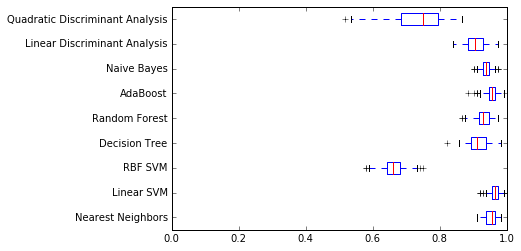

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from enum import Enum
from skimage import data
%matplotlib inline
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
         "Quadratic Discriminant Analysis"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

#X = StandardScaler().fit_transform(X)
# y_train will be an array that designates if there is a person or not a person in an image
# X_train is all of our images
classifier_scores = []
plt.xlim((0,1))
for name, clf in zip(names, classifiers):  
    scores = []
    for j in range(0,100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
        # iterate over classifiers

        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
    classifier_scores.append(scores)

plt.boxplot(classifier_scores, vert=False)
plt.yticks(range(1,len(classifiers) + 1), names)

# Save the Best Classifier (Nearest Neighbors)

In [44]:
from sklearn.externals import joblib
import copy
max_score = 0
clf = KNeighborsClassifier(3)
for j in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    # iterate over classifiers

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if (score > max_score):
        max_clf = copy.deepcopy(clf)
        max_score = score

print(max_score)        
joblib.dump(max_clf, 'classifier.pkl') 

0.991071428571


['classifier.pkl',
 'classifier.pkl_01.npy',
 'classifier.pkl_02.npy',
 'classifier.pkl_03.npy',
 'classifier.pkl_04.npy',
 'classifier.pkl_05.npy',
 'classifier.pkl_06.npy',
 'classifier.pkl_07.npy',
 'classifier.pkl_08.npy',
 'classifier.pkl_09.npy']